# Logistic Regression Classifier From Scratch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import math
import pdb

# Load Data

In [5]:
base_path = "/Users/loreliegordon/Library/Mobile Documents/com~apple~CloudDocs/Documents/root/Columbia/Fall2021/ELEN4720/Assignments/assignment2/"

X_all = pd.read_csv(base_path + "hw2-data/Bayes_classifier/X.csv", header=None)
one_col = np.ones((len(X_all), 1))
X_all = np.concatenate([X_all, one_col], axis=1)
y_all = pd.read_csv(base_path + "hw2-data/Bayes_classifier/y.csv", header=None)
y_all = y_all.to_numpy()
y_train = y_all
X_train = X_all

# What the Logistic Regression Classifier does

## Training
- 


## Predicting
- 

In [22]:
def sigmoid(x):
    """Sigmoid function implementation"""
    return float(1) / (1 + np.exp(-1*x))

def logistic_regression_loss_vectorized(W, X, y, reg):
    """
    Logistic regression loss function, vectorized version.
    Use this linear classification method to find optimal decision boundary.

    Inputs and outputs are the same as softmax_loss_naive.
    """
    loss = 0
    # Initialize the gradient to zero
    dW = np.zeros_like(W)
    n = len(y)
    f = X @ W
    y = y.reshape(1, n)
    sig_f = sigmoid(f)
    loss_a = (y @ np.log(sig_f))/n
    loss_b = ((1-y) @ np.log(1-sig_f))/n 
    loss_c = reg*(W**2).mean()
    loss = loss_a + loss_b + loss_c
    y = y.reshape((n, 1))
    dW = X.T @ (y-sig_f)
    dW = dW.reshape(W.shape)
    dW -= (2*reg*(W))
    return -1*loss[0], dW

def newtons_method_loss(W, W_old, X, y, reg):

    dW = np.zeros_like(W)
    n = len(y)
    y = y.reshape((n, 1))
    y_t = y.reshape(1, n)
    f = X @ W
    
    sig_f = sigmoid(f)
    loss_a = (y_t @ np.log(sig_f))/n
    loss_b = ((1-y_t) @ np.log(1-sig_f))/n 
    loss_c = reg*(W**2).mean()
    loss = -1*(loss_a + loss_b + loss_c)

    dW = X.T @ (y-sig_f)
    dW = dW.reshape(W.shape)
    D = (sig_f * (1 - sig_f))
    D = D.reshape(len(D))
    D = np.diag(D)
    H = X.T @ D @ X
    weight_change = (W - W_old)
    grad_term = weight_change.T @ dW
    sec_grad_term = 0.5*weight_change.T @ H @ weight_change
    loss_prime = loss + grad_term + sec_grad_term
    try:
        dW_update = np.linalg.inv(H) @ dW
        return loss_prime,  dW_update.reshape(W.shape)
    except:
        print("couldn't calculate hessian")
        return loss,  dW

In [7]:
class BasicClassifier():
    """Basic classifier 
    
    - Training is done batched gradient descent
    - f = X * W
    - 
    """

    def __init__(self) -> None:
        self.weights = None

    def initialize_weights(self, dim):
        self.weights = 0.001 * np.random.randn(dim, 1)
        self.old_weights = 0.001 * np.random.randn(dim, 1)

    def train(self, X_train, y_train, batch_size=100, learning_rate=0.00002, training_iterations=1000, reg=1e-5):
        """This function will implement batched gradient descent
        """
        num_train = len(X_train)
        num_predictors = len(X_train[0])

        if self.weights is None:
            self.initialize_weights(num_predictors)
        
        all_loss = []
        for i in range(training_iterations):
            if batch_size:
                random_iis = np.random.choice(range(num_train), size=batch_size)
                X_batch = X_train[random_iis]
                y_batch = y_train[random_iis]
            else:
                X_batch = X_train
                y_batch = y_train
            loss, dW = self.loss(X_batch, y_batch, regularization=reg)
            all_loss.append(loss)
            self.old_weights = self.weights
            self.weights += learning_rate * dW
            if i % 10 == 0:
                print('iteration %d / %d: loss %f' % (i, training_iterations, loss))
        return all_loss

    def loss(self):
        raise NotImplementedError("Inherit this class and overwrite this function.")

    def fit(self, X_train, y_train):
        """Fit the input data

        After this function the model parameters will be fit. We need to have:
        -

        Args:
            X_train (np.array): Training features
            y_train (np.array): Single column for the binary predicted class either 0 or 1
        """
        return self.train(X_train, y_train)

    def predict(self, X):
        """Predict new data

        To predict we need to:
            - Calculate the probability of being either class
            - Choose the class with the higher probability
        """
        probs = X @ self.weights
        return probs > 0



class LogisticRegression(BasicClassifier):
    """LogisticRegression

    This is an implementation from scratch that has the following:
    - Input data x is assumed to follow a poisson distribution with prior gamma(2,1)
    - Y follows a bernoulli
    """

    def __init__(self, *args, **kwargs) -> None:
        self.method = kwargs.pop("method", "grad_desc")
        return super().__init__(*args, **kwargs)

    
    def loss(self, X_train, y_train, regularization):
        if self.method == "grad_desc":
            return logistic_regression_loss_vectorized(self.weights, X_train, y_train, regularization)
        elif self.method == "newton":
            return newtons_method_loss(self.weights, self.old_weights, X_train, y_train, regularization)

    


In [331]:

y_test_1_y_pred_1 = []
y_test_0_y_pred_0 = []
y_test_1_y_pred_0 = []
y_test_0_y_pred_1 = []

all_losses = []


kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X_all):
    print("------------------------------------ NEW TEST ------------------------------------")
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    cl = LogisticRegression()

    loss_data = cl.train(X_train, y_train, learning_rate=0.01/4600, batch_size=4600, training_iterations=1000)
    y_pred = cl.predict(X_test)
    all_losses.append(loss_data)
    

    joined = pd.concat([pd.DataFrame(y_pred, columns=["y_pred"]), pd.DataFrame(y_test, columns=["y_test"])], axis=1)
    joined["correct"] = joined["y_pred"] == joined["y_test"]
    y_test_1_y_pred_1.append(joined.loc[(joined["correct"] == True) & (joined["y_test"] == 1),"correct"].count()) # /len(y_test)
    y_test_0_y_pred_0.append(joined.loc[(joined["correct"] == True) & (joined["y_test"] == 0),"correct"].count()) # /len(y_test)
    y_test_1_y_pred_0.append(joined.loc[(joined["correct"] == False) & (joined["y_test"] == 1),"correct"].count()) # /len(y_test)
    y_test_0_y_pred_1.append(joined.loc[(joined["correct"] == False) & (joined["y_test"] == 0),"correct"].count()) # /len(y_test)
    
y_test_0_y_pred_0_avg = sum(y_test_0_y_pred_0)#/len(y_test_0_y_pred_0)
y_test_0_y_pred_1_avg = sum(y_test_0_y_pred_1)#/len(y_test_0_y_pred_1)
y_test_1_y_pred_0_avg = sum(y_test_1_y_pred_0)#/len(y_test_1_y_pred_0)
y_test_1_y_pred_1_avg = sum(y_test_1_y_pred_1)#/len(y_test_1_y_pred_1)
[[y_test_0_y_pred_0_avg, y_test_0_y_pred_1_avg], [y_test_1_y_pred_0_avg, y_test_1_y_pred_1_avg]]


------------------------------------ NEW TEST ------------------------------------
iteration 0 / 1000: loss 0.693338
iteration 100 / 1000: loss 0.251873
iteration 200 / 1000: loss 0.252365
iteration 300 / 1000: loss 0.238385
iteration 400 / 1000: loss 0.231796
iteration 500 / 1000: loss 0.229947
iteration 600 / 1000: loss 0.236804
iteration 700 / 1000: loss 0.226493
iteration 800 / 1000: loss 0.218084
iteration 900 / 1000: loss 0.238149
------------------------------------ NEW TEST ------------------------------------
iteration 0 / 1000: loss 0.689797
iteration 100 / 1000: loss 0.268992
iteration 200 / 1000: loss 0.239548
iteration 300 / 1000: loss 0.221198
iteration 400 / 1000: loss 0.234766
iteration 500 / 1000: loss 0.242028
iteration 600 / 1000: loss 0.234222
iteration 700 / 1000: loss 0.211606
iteration 800 / 1000: loss 0.230107
iteration 900 / 1000: loss 0.224818
------------------------------------ NEW TEST ------------------------------------
iteration 0 / 1000: loss 0.694960
i

[[2619, 168], [168, 1645]]

In [332]:
all_losses_df = np.array(all_losses)
all_losses_df = all_losses_df.reshape(len(all_losses_df), len(all_losses_df[0]))
all_losses_df = pd.DataFrame(all_losses_df).T
all_losses_df["iter"] = all_losses_df.index
all_losses_df = all_losses_df.melt(id_vars=["iter"])



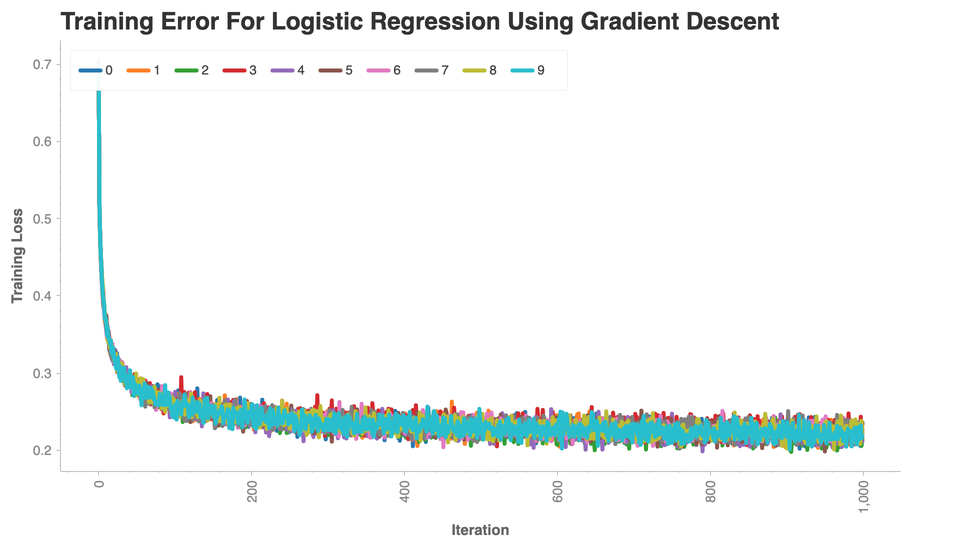

In [333]:

import chartify
ch = chartify.Chart(blank_labels=True)
ch.set_title("Training Error For Logistic Regression Using Gradient Descent")
ch.plot.line(
    data_frame=all_losses_df,
    color_column="variable",
    x_column='iter',
    y_column="value")
ch.axes.set_yaxis_label("Training Loss")
ch.axes.set_xaxis_label("Iteration")
ch.axes.set_xaxis_tick_orientation("vertical")
ch.show('png')

In [36]:
y_test_1_y_pred_1 = []
y_test_0_y_pred_0 = []
y_test_1_y_pred_0 = []
y_test_0_y_pred_1 = []

all_losses = []


kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X_all):
    print("------------------------------------ NEW TEST ------------------------------------")
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y_all[train_index], y_all[test_index]

    cl = LogisticRegression(method="newton")

    loss_data = cl.train(X_train, y_train, learning_rate=0.03, batch_size=4600, training_iterations=100)
    loss_data = loss_data[1:] # First loss point is incorrect as old weights are initialized as random.
    y_pred = cl.predict(X_test)
    all_losses.append(loss_data)
    

    joined = pd.concat([pd.DataFrame(y_pred, columns=["y_pred"]), pd.DataFrame(y_test, columns=["y_test"])], axis=1)
    joined["correct"] = joined["y_pred"] == joined["y_test"]
    y_test_1_y_pred_1.append(joined.loc[(joined["correct"] == True) & (joined["y_test"] == 1),"correct"].count()) # /len(y_test)
    y_test_0_y_pred_0.append(joined.loc[(joined["correct"] == True) & (joined["y_test"] == 0),"correct"].count()) # /len(y_test)
    y_test_1_y_pred_0.append(joined.loc[(joined["correct"] == False) & (joined["y_test"] == 1),"correct"].count()) # /len(y_test)
    y_test_0_y_pred_1.append(joined.loc[(joined["correct"] == False) & (joined["y_test"] == 0),"correct"].count()) # /len(y_test)
    
y_test_0_y_pred_0_avg = sum(y_test_0_y_pred_0)#/len(y_test_0_y_pred_0)
y_test_0_y_pred_1_avg = sum(y_test_0_y_pred_1)#/len(y_test_0_y_pred_1)
y_test_1_y_pred_0_avg = sum(y_test_1_y_pred_0)#/len(y_test_1_y_pred_0)
y_test_1_y_pred_1_avg = sum(y_test_1_y_pred_1)#/len(y_test_1_y_pred_1)
[[y_test_0_y_pred_0_avg, y_test_0_y_pred_1_avg], [y_test_1_y_pred_0_avg, y_test_1_y_pred_1_avg]]

all_losses_df = np.array(all_losses)
all_losses_df = all_losses_df.reshape(len(all_losses_df), len(all_losses_df[0]))
all_losses_df = pd.DataFrame(all_losses_df).T
all_losses_df["iter"] = all_losses_df.index
all_losses_df = all_losses_df.melt(id_vars=["iter"])

------------------------------------ NEW TEST ------------------------------------
iteration 0 / 100: loss 5.386685
iteration 10 / 100: loss 0.551464
iteration 20 / 100: loss 0.469033
iteration 30 / 100: loss 0.404728
iteration 40 / 100: loss 0.360218
iteration 50 / 100: loss 0.325921
iteration 60 / 100: loss 0.304358
iteration 70 / 100: loss 0.275884
iteration 80 / 100: loss 0.264748
iteration 90 / 100: loss 0.255908
------------------------------------ NEW TEST ------------------------------------
iteration 0 / 100: loss 42.310915
iteration 10 / 100: loss 0.555417
iteration 20 / 100: loss 0.467349
iteration 30 / 100: loss 0.408300
iteration 40 / 100: loss 0.353922
iteration 50 / 100: loss 0.321344
iteration 60 / 100: loss 0.305691
iteration 70 / 100: loss 0.288014
iteration 80 / 100: loss 0.267775
iteration 90 / 100: loss 0.248305
------------------------------------ NEW TEST ------------------------------------
iteration 0 / 100: loss -25.031761
iteration 10 / 100: loss 0.557433
ite

In [37]:
[[y_test_0_y_pred_0_avg, y_test_0_y_pred_1_avg], [y_test_1_y_pred_0_avg, y_test_1_y_pred_1_avg]]

[[2647, 140], [258, 1555]]

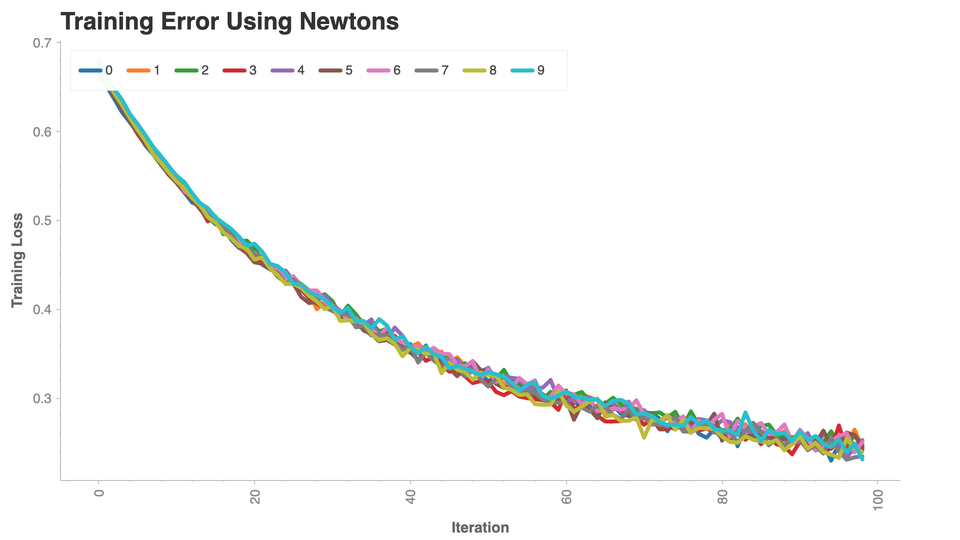

In [38]:
import chartify
ch = chartify.Chart(blank_labels=True)
ch.set_title("Training Error Using Newtons")
ch.plot.line(
    data_frame=all_losses_df,
    color_column="variable",
    x_column='iter',
    y_column="value")
ch.axes.set_yaxis_label("Training Loss")
ch.axes.set_xaxis_label("Iteration")
ch.axes.set_xaxis_tick_orientation("vertical")
ch.show('png')